## Data Exploration
We will import the cleaned data and Explore the relationship of Flgiht Prices with 3 types of variables:
1. Time (Flight Duration/Departure Time/Number of Stops/ Day of the week)
2. Location (Flight Source and Destination)
3. Airline and Class (Economy/Business)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
data_path = "/home/akhilesh/DataScience/FlightPricePrediction/cleaned_data.csv"
data= pd.read_csv(data_path,index_col=['Unnamed: 0'])
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Price,Arrival_Hour,Arrival_Day,Arrival_Min,Dep_Hour,Dep_Day,Dep_Min,Journey_Day,Journey_Month,Journey_Year,Journey_DOW
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,0,3897,1,22,10,22,18,20,24,3,2019,6
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,13,18,15,5,18,50,5,1,2019,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,4,10,25,9,18,25,6,9,2019,4
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,23,18,30,18,18,5,5,12,2019,3
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,21,18,35,16,18,50,3,1,2019,3


<AxesSubplot:xlabel='Price', ylabel='Fraction of Flights(Cumulative)'>

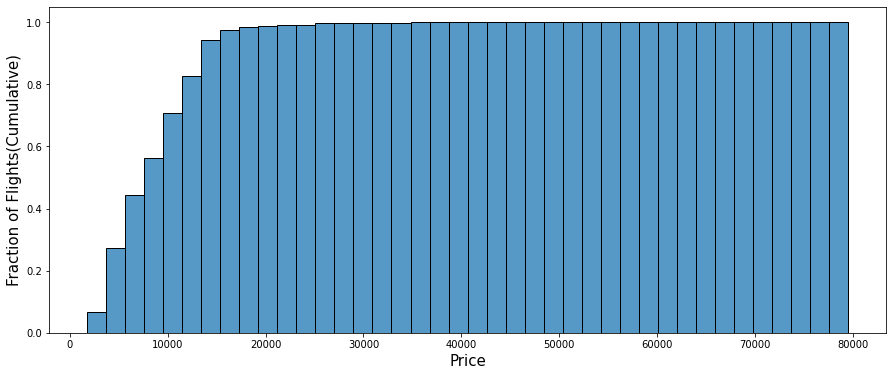

In [3]:
Fig=plt.figure(figsize=(15,6))
Fig=plt.xlabel('Price',fontsize=15)
Fig=plt.ylabel('Fraction of Flights(Cumulative)',fontsize=15)

sns.histplot(data['Price'],stat='proportion',bins=40,cumulative=True)

The Prices vary greatly from 2k to 80k INR. However, around 80% of the flights cost below 10K INR.

<AxesSubplot:xlabel='Duration', ylabel='Fraction of Flights'>

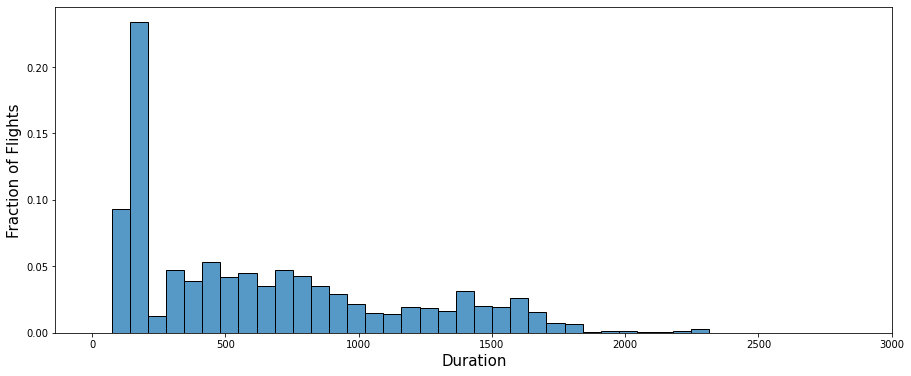

In [4]:
Fig=plt.figure(figsize=(15,6))
Fig=plt.xlabel('Duration',fontsize=15)
Fig=plt.ylabel('Fraction of Flights',fontsize=15)
sns.histplot(data['Duration'],stat='proportion')

Around 23% of the total flights are around 215 min or 3hr 45 min long.

<AxesSubplot:xlabel='Number of Stops', ylabel='Fraction of Flights'>

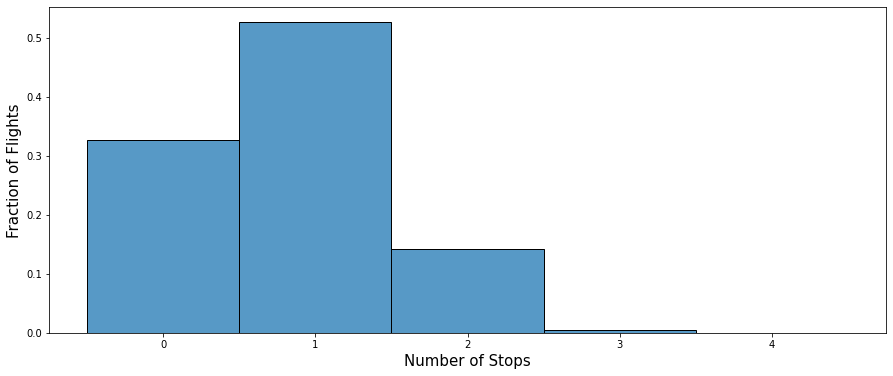

In [5]:
Fig=plt.figure(figsize=(15,6))
Fig=plt.xlabel('Number of Stops',fontsize=15)
Fig=plt.ylabel('Fraction of Flights',fontsize=15)
sns.histplot(data['Total_Stops'],stat='proportion',bins=6,discrete=True)

Around 50 percent of flights have one stop and around 30 percent have no stop.

<AxesSubplot:xlabel='Month', ylabel='Fraction of Flights'>

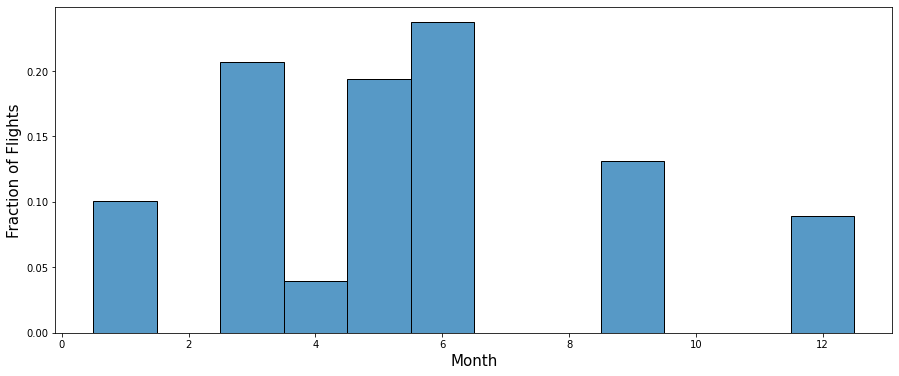

In [6]:
Fig=plt.figure(figsize=(15,6))
Fig=plt.xlabel('Month',fontsize=15)
Fig=plt.ylabel('Fraction of Flights',fontsize=15)
sns.histplot(data['Journey_Month'],stat='proportion',bins=12,discrete=True)

<AxesSubplot:xlabel='Day of the Week', ylabel='Fraction of Flights'>

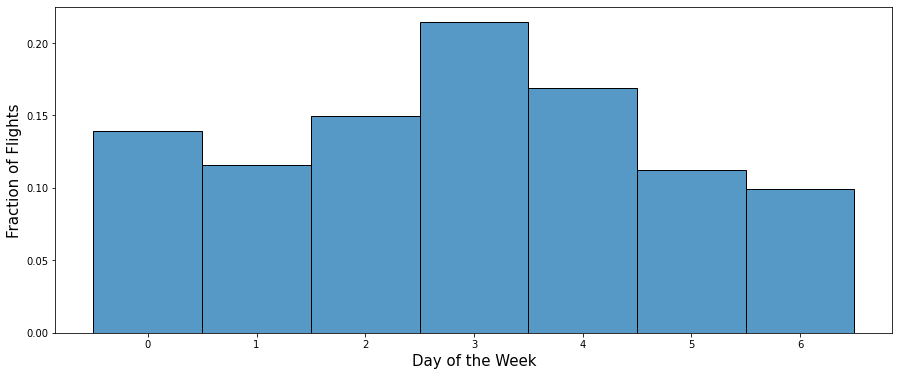

In [7]:
Fig=plt.figure(figsize=(15,6))
Fig=plt.xlabel('Day of the Week',fontsize=15)
Fig=plt.ylabel('Fraction of Flights',fontsize=15)
sns.histplot(data['Journey_DOW'],stat='proportion',bins=7,discrete=True)

It seems that people fly the most during Spring and in Winter. It seems dubious that there are no travellers during Feb, July, August... It is possible that data may not have been recorded for these months. So we will ignore this column entirely in order to reduce bias. Nonetheless, we can safely say that a (more or less) uniform fraction of people travel throughout the week. 


Now we can explore how Prices behave with these variables.

<AxesSubplot:xlabel='Flight Duration', ylabel='Price'>

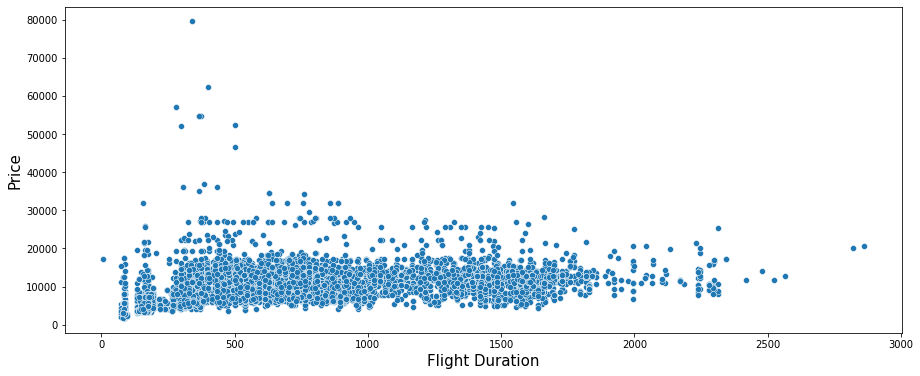

In [8]:
Fig=plt.figure(figsize=(15,6))
Fig=plt.xlabel('Flight Duration',fontsize=15)
Fig=plt.ylabel('Price',fontsize=15)
sns.scatterplot(x=data['Duration'],y=data['Price'])

The prices do not depend too much on Duration.

<AxesSubplot:xlabel='Flight Duration', ylabel='Price'>

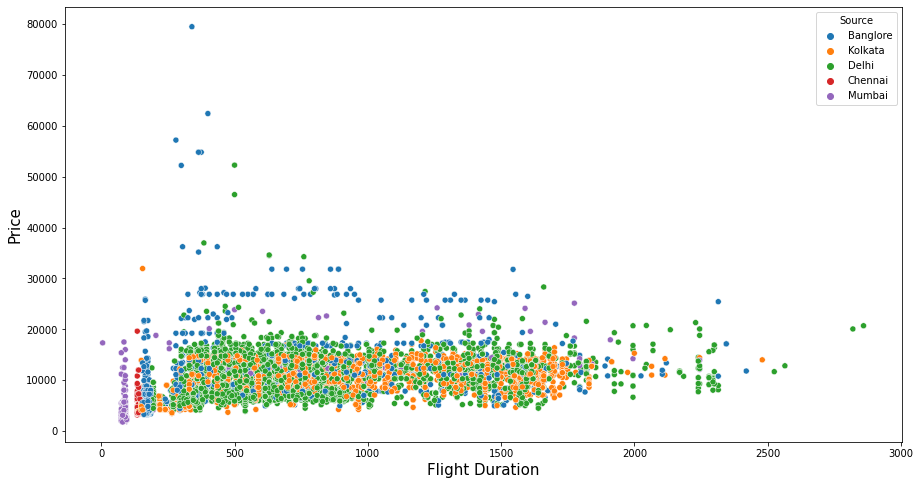

In [9]:
Fig=plt.figure(figsize=(15,8))
Fig=plt.xlabel('Flight Duration',fontsize=15)
Fig=plt.ylabel('Price',fontsize=15)
sns.scatterplot(data=data,x='Duration',y='Price',hue='Source')

<AxesSubplot:xlabel='Source', ylabel='Price'>

3850.0


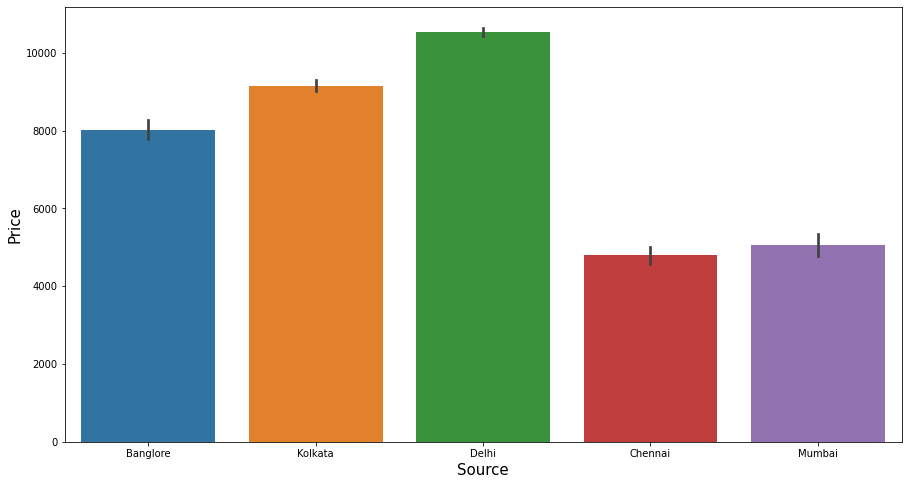

In [10]:
Fig=plt.figure(figsize=(15,8))
Fig=plt.xlabel('Source',fontsize=15)
Fig=plt.ylabel('Price',fontsize=15)
sns.barplot(data=data,x='Source',y='Price',estimator='mean')
prices=data.loc[data['Source'] == 'Chennai', 'Price']
print(prices.median())

Prices seem to change with Sources. Cheapest Flights are from Chennai, While the most expensive ones are from Delhi.

In [11]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

New Delhi and Delhi have a common airport. So we can replace New Delhi with Delhi and examine the Prices vs Destinations Barplot.

In [12]:
data.loc[data['Destination'] == 'New Delhi', 'Destination'] = 'Delhi'
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

<AxesSubplot:xlabel='Destination', ylabel='Price'>

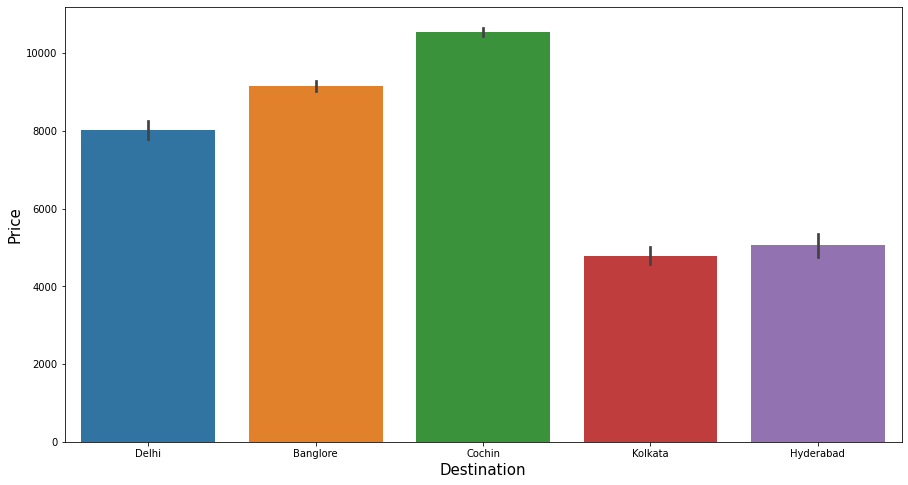

In [13]:
Fig=plt.figure(figsize=(15,8))
Fig=plt.xlabel('Destination',fontsize=15)
Fig=plt.ylabel('Price',fontsize=15)
sns.barplot(data=data,x='Destination',y='Price')

Flights to Cochin are the most expensive whereas flights to Kolkata are the cheapest.

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

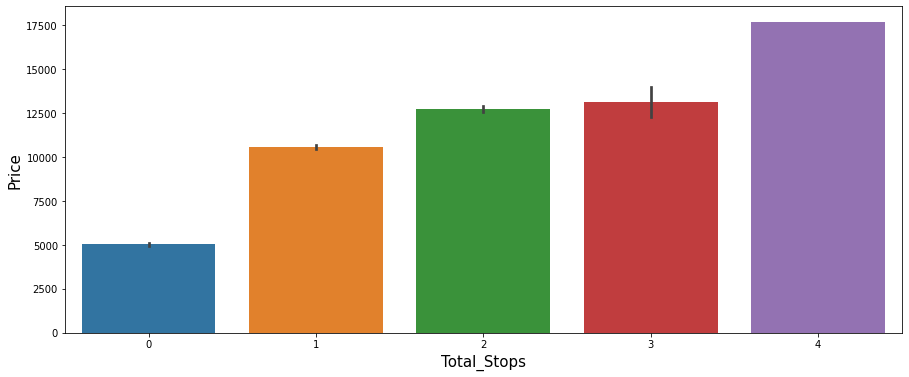

In [14]:
Fig=plt.figure(figsize=(15,6))
Fig=plt.xlabel('Total_Stops',fontsize=15)
Fig=plt.ylabel('Price',fontsize=15)
sns.barplot(x=data['Total_Stops'],y=data['Price'])

Prices seem to increases with Total Stops.

<AxesSubplot:xlabel='Journey_DOW', ylabel='Price'>

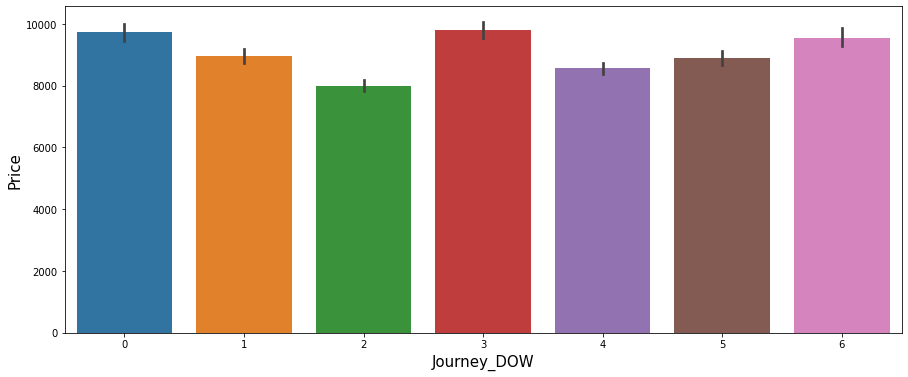

In [15]:
Fig=plt.figure(figsize=(15,6))
Fig=plt.xlabel('Day of the Week',fontsize=15)
Fig=plt.ylabel('Price',fontsize=15)
sns.barplot(x=data['Journey_DOW'],y=data['Price'])

Prices do not seem to depend too much on the day of the week. We can also whether Prices depend on the time of the day(Morning/Evening/etc).

In [16]:
def flight_dep_time(x):
    '''
    This function takes the flight Departure time 
    and convert into Readable String Format.
    
    '''
    
    if (x>4) and (x<=8):
        return "Early Morning"
    
    elif (x>8) and (x<=12):
        return "Morning"
    
    elif (x>12) and (x<=16):
        return "Noon"
    
    elif (x>16) and (x<=20):
        return "Evening"
    
    elif (x>20) and (x<=24):
        return "Night"
    
    else:
        return "late night"

In [17]:
data['Dep_HourOfDay']=data['Dep_Hour'].apply(flight_dep_time)

<AxesSubplot:xlabel='Dep_HourOfDay', ylabel='Price'>

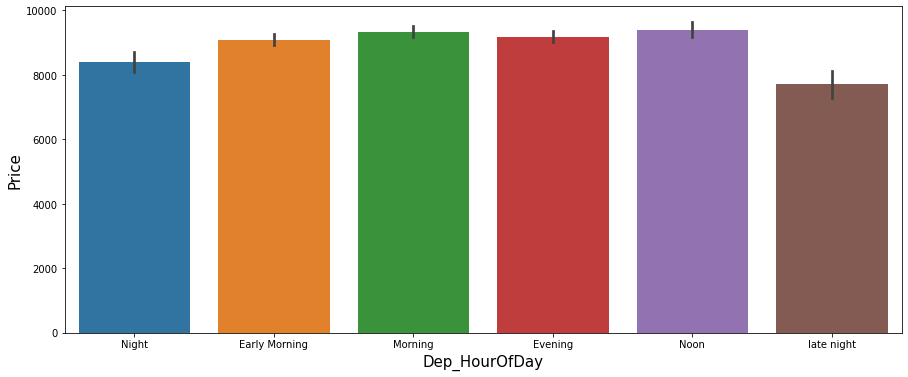

In [18]:
Fig=plt.figure(figsize=(15,6))
Fig=plt.xlabel('Time of the Day',fontsize=15)
Fig=plt.ylabel('Price',fontsize=15)
sns.barplot(x=data['Dep_HourOfDay'],y=data['Price'])

### Airlines

In [19]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

<AxesSubplot:xlabel='Airline', ylabel='Price'>

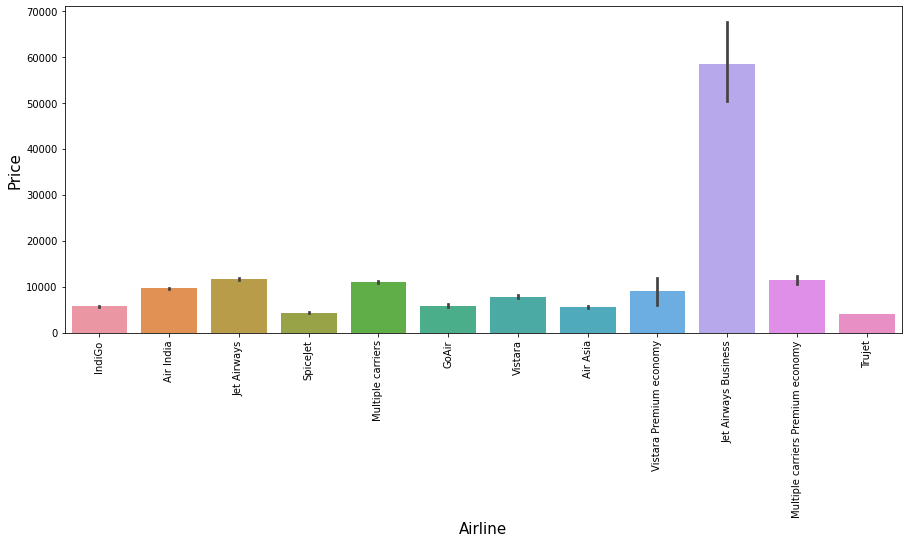

In [20]:
Fig=plt.figure(figsize=(15,6))
Fig=plt.xlabel('Time of the Day',fontsize=15)
Fig=plt.ylabel('Price',fontsize=15)
Fig=plt.xticks(rotation=90)
sns.barplot(x=data['Airline'],y=data['Price'],estimator='mean')

**To summarize, Prices vary greatly from 2K INR to 80K INR. The seem to be dependent most on Source and Destination and number of stops. This is obvious in the hindsight. Jet Airways Business Class have the most expensive Tickets whereas Trujet have the cheapest.** In the next notebook we will perform feature Engineering and selection based on the things we learned in this section. We will also take care of outliers in the dataset. Finally, we will train our ML model(s).

In [21]:
data.to_csv("/home/akhilesh/DataScience/FlightPricePrediction/cleaned_data2.csv")